We will construct a Linear model that explanes the relationship a cars's mileage(MPG) has with other attributes

# New Section

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
car_data=pd.read_csv('/content/auto-mpg.csv')

In [ ]:
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
car_data.shape

(398, 9)

In [ ]:
car_data['origin']=car_data['origin'].replace({1:'america',2:'europe',3:'japan'})

In [ ]:
car_data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,america,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,america,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,america,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,america,chevy s-10


In [ ]:
car_data.drop('car name',axis=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,america
394,44.0,4,97.0,52,2130,24.6,82,europe
395,32.0,4,135.0,84,2295,11.6,82,america
396,28.0,4,120.0,79,2625,18.6,82,america


In [ ]:
car_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
car_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin           object
car name         object
dtype: object

In [ ]:
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,america,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,america,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,america,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,america,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,america,ford torino


In [ ]:
car_data = car_data.drop('car name',axis=1)

In [ ]:
hpIsDigit = pd.DataFrame(car_data.horsepower.str.isdigit())
car_data[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,america
126,21.0,6,200.0,?,2875,17.0,74,america
330,40.9,4,85.0,?,1835,17.3,80,europe
336,23.6,4,140.0,?,2905,14.3,80,america
354,34.5,4,100.0,?,2320,15.8,81,europe
374,23.0,4,151.0,?,3035,20.5,82,america


In [ ]:
car_data['horsepower'] = car_data['horsepower'].replace('?',np.nan)

In [ ]:
car_data[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,america
126,21.0,6,200.0,NaN,2875,17.0,74,america
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,america
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,america


In [ ]:
car_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [ ]:
car_data.median()

<ipython-input-62-3f4ea72e0b50>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car_data.median()


mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model year        76.0
dtype: float64

In [ ]:
car_data['horsepower'] = car_data['horsepower'].fillna(car_data['horsepower'].median())

In [ ]:
car_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [ ]:
car_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [ ]:
car_data['horsepower'] = car_data['horsepower'].astype('float64')

In [ ]:
car_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

**Create Dummy veriables**

In [ ]:
car_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,america
1,15.0,8,350.0,165.0,3693,11.5,70,america
2,18.0,8,318.0,150.0,3436,11.0,70,america
3,16.0,8,304.0,150.0,3433,12.0,70,america
4,17.0,8,302.0,140.0,3449,10.5,70,america
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,america
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,america
396,28.0,4,120.0,79.0,2625,18.6,82,america


In [ ]:
car_data = pd.get_dummies(car_data,['origin'])
car_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_europe,origin_japan
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


In [ ]:
car_data_attr =car_data.iloc[:,0:7]
car_data_attr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


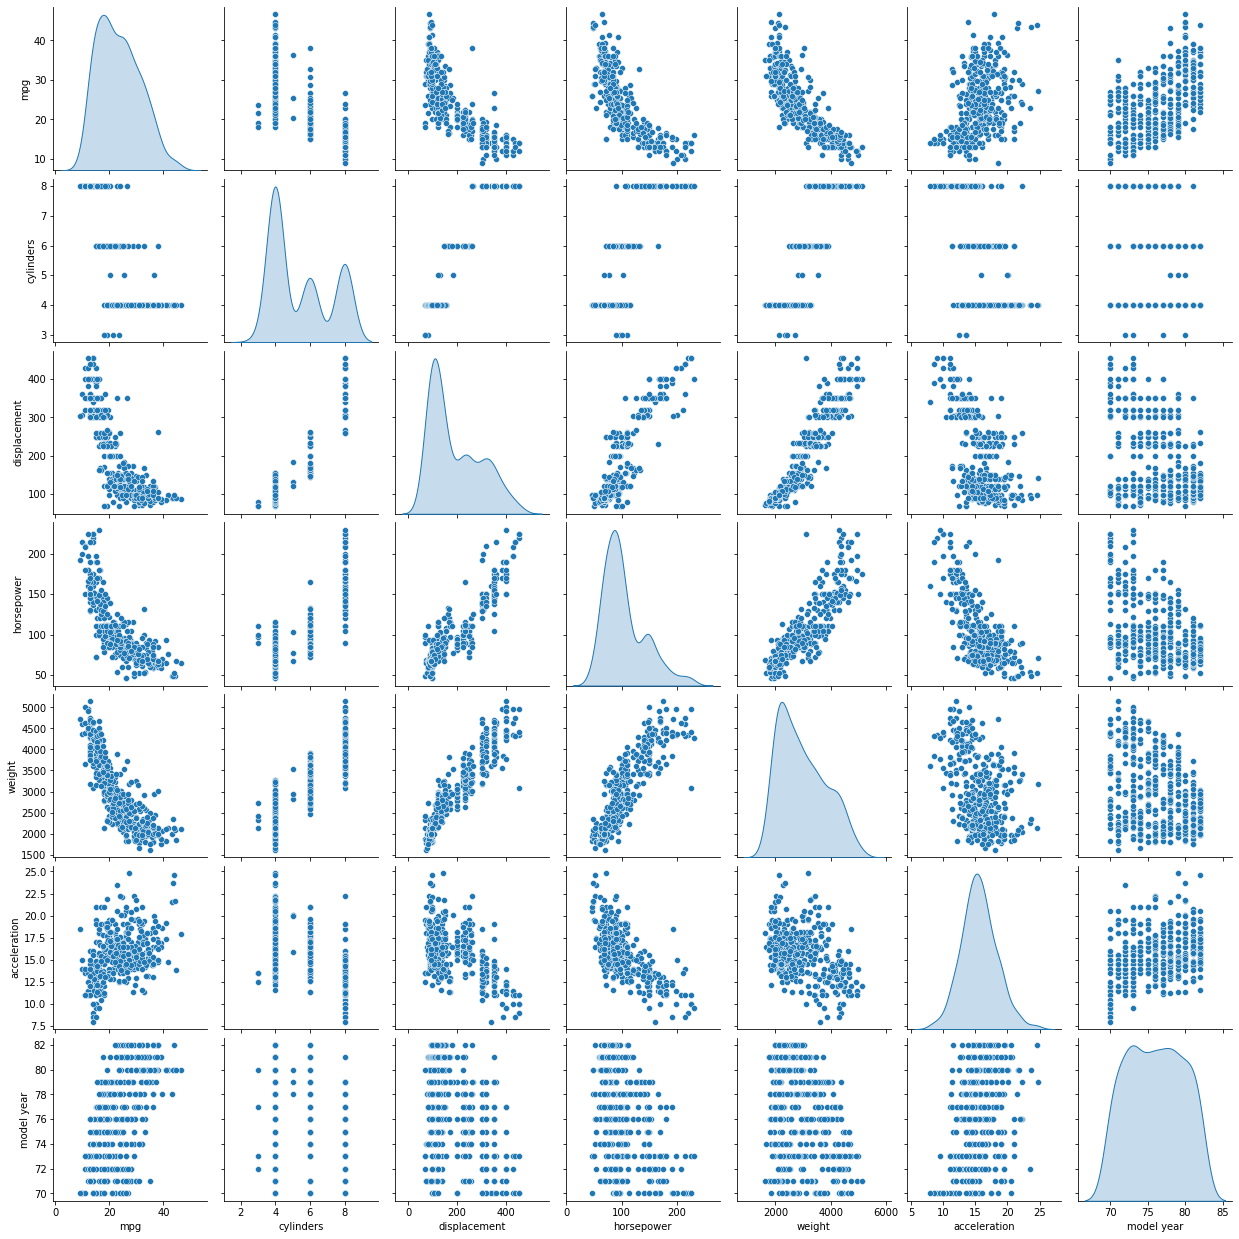

In [ ]:
sns.pairplot(car_data_attr,diag_kind='kde')
plt.show()

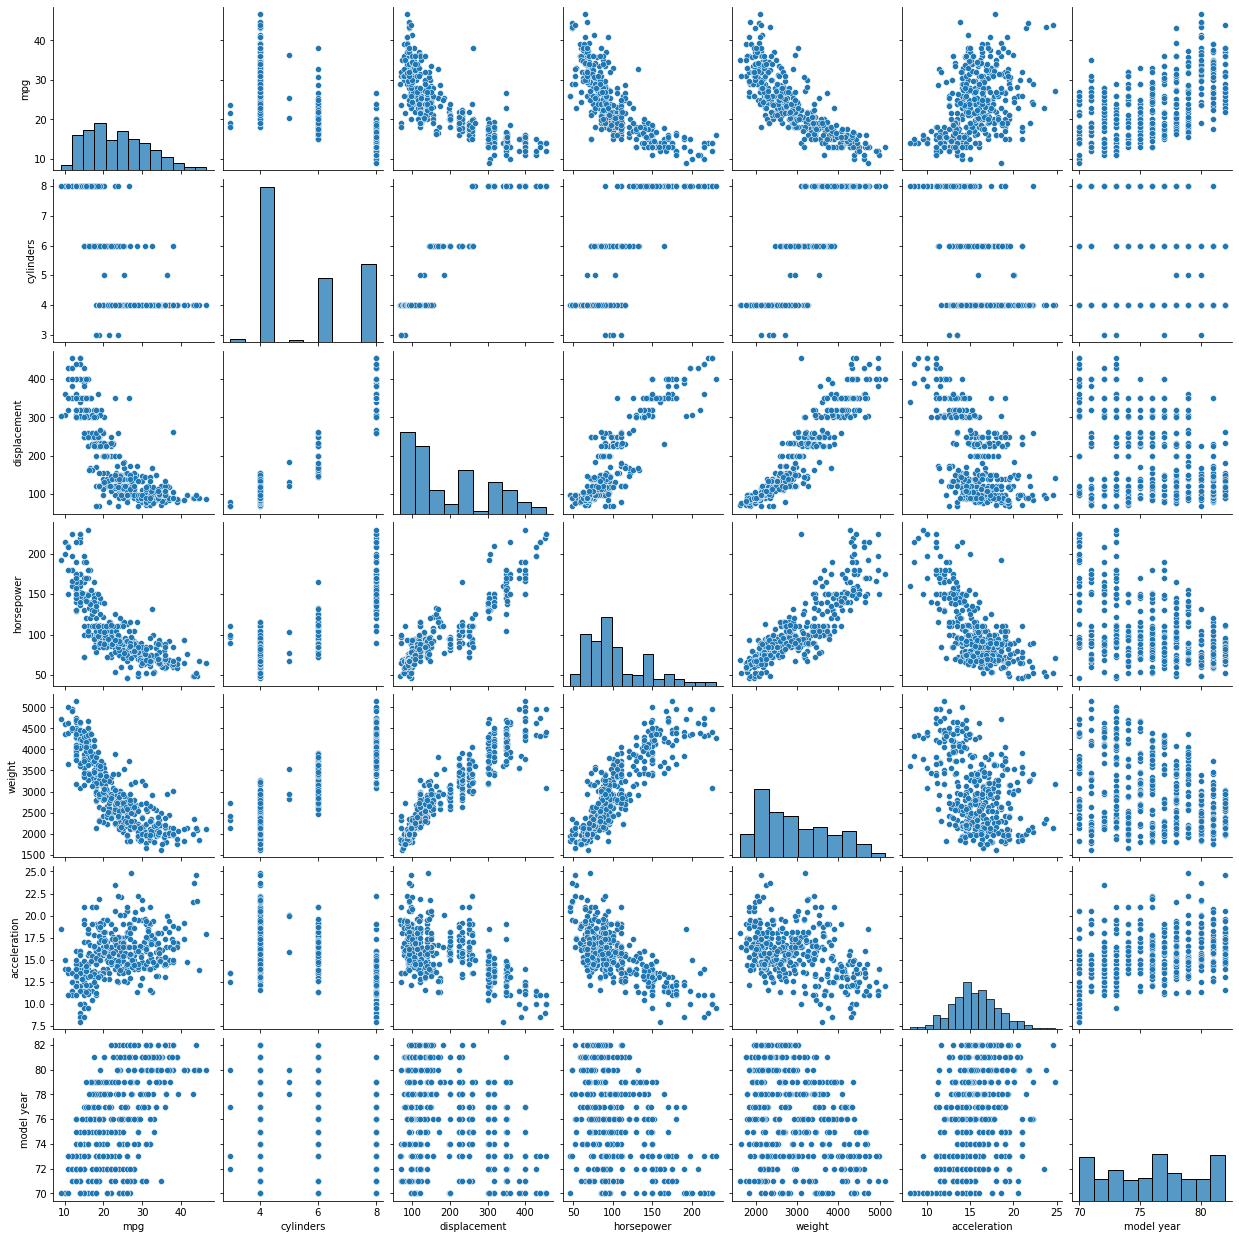

In [ ]:
sns.pairplot(car_data_attr)
plt.show()

In [ ]:
car_data_attr.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000


In [ ]:
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin_america,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_europe,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0
origin_japan,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    float64
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_america  398 non-null    uint8  
 8   origin_europe   398 non-null    uint8  
 9   origin_japan    398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 23.1 KB


In [ ]:
car_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_europe,origin_japan
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


In [ ]:
y = car_data['mpg']
x= car_data.drop('mpg',axis=1)

In [ ]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [ ]:
x.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_europe,origin_japan
0,8,307.0,130.0,3504,12.0,70,1,0,0
1,8,350.0,165.0,3693,11.5,70,1,0,0
2,8,318.0,150.0,3436,11.0,70,1,0,0
3,8,304.0,150.0,3433,12.0,70,1,0,0
4,8,302.0,140.0,3449,10.5,70,1,0,0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=1)

In [ ]:
regression_model=LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
regression_model.coef_

array([-0.39480797,  0.02894551, -0.02175221, -0.00735203,  0.06191937,
        0.83693389, -1.79884935,  1.20243366,  0.59641569])

In [ ]:
for idx,col_name in enumerate(x_train.columns):
  print('The coefficient for{} is{} '.format(col_name,regression_model.coef_[idx]))

The coefficient forcylinders is-0.3948079661648308 
The coefficient fordisplacement is0.028945510765487445 
The coefficient forhorsepower is-0.021752207723547353 
The coefficient forweight is-0.007352032065147351 
The coefficient foracceleration is0.061919366007617216 
The coefficient formodel year is0.8369338917645015 
The coefficient fororigin_america is-1.7988493458374275 
The coefficient fororigin_europe is1.2024336550810835 
The coefficient fororigin_japan is0.5964156907563433 


In [ ]:
regression_model.intercept_

-19.485884771453247

In [ ]:
regression_model.predict(x_test)

array([20.91554528, 27.78619415, 20.35450492, 26.7530043 , 24.34440311,
       15.94627895, 29.61711144, 34.54999717, 17.08487642, 10.56570744,
       30.27190054, 16.46101954, 22.34949158, 27.36817515, 36.4916326 ,
       23.52414572, 10.95688403, 20.15994355,  9.06847316, 33.03329847,
       25.97760019, 32.32715763, 20.84295791, 25.08512814, 25.67024575,
       30.00444827, 32.58061387, 32.5462297 , 15.1314045 , 30.17173763,
       27.18513498, 11.04447745, 21.28330056, 28.68243423, 24.88266353,
       13.63888896, 26.37838591,  9.21013918, 31.6904227 , 23.85386165,
       23.89949396, 24.41984635, 21.05348912, 34.13688229, 25.91853825,
       22.15815042, 21.15554401, 11.6783042 , 28.50708814, 19.00196555,
       24.24819425, 26.62821232, 17.07117894, 12.10403757, 28.34022188,
       24.82823055, 10.32835574, 13.09624022, 30.49807412, 35.81856922,
       36.58585421, 35.86191278, 17.92313015, 27.49879047, 20.67007774,
       33.42297856, 26.59143064, 26.57457423, 29.67371196, 12.34

In [ ]:
regression_model.score(x_test,y_test)*100

84.33135132808827

In [ ]:
from sklearn import metrics

prediction = regression_model.predict(x_test)

metrics.mean_absolute_error(y_test,prediction)

2.3542812072204025

In [ ]:
MAE = metrics.mean_absolute_error(y_test,prediction)

In [ ]:
RMSE = np.sqrt(MAE)

In [ ]:
RMSE

1.5343667121064646